<a href="https://colab.research.google.com/github/abougabal/DATABASE_WEB/blob/master/location_tracking_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Objective
*   Know more about fingerprinting localization using Deep learning.
*   Learn how to compare the different systems.
*   Review Keras Deep learning framework using python programming.
*   Learn how to implement and evaluate Deep learning based systems.

# 2. Problem statement
>## Offline phase
The problem we are trying to solve here is finding user estimated location from a scan of the received signal strength (RSS) coming from the different APs in the environment using Deep learning-based fingerprinting techniques. The input to the problem is the fingerprint (which is collected in an offline calibration phase). The fingerprint is the RSS from the different APs in the environment geo-tagged with the location. The following code defines a fingerprint with 24 RSS samples with their fingerprinting locations *fingerprint_locs*. Each sample in the fingerprint consists of a scan of the RSS coming from the different APs (mainly four APs) and the groundtruth location (the true location). e.g the first sample has RSS scan from four APs: [-64., -73., -70., -85.] dBm and its true location is [11.74, 6.76] meter.


In [ ]:
'''
Fingerprint data
'''
fingerprint_rss = [[-64., -73., -70., -85.], \
                   [-57., -63., -81., -84.], \
                   [-54., -51., -75., -75.], \
                   [-45., -72., -90., -54.], \
                   [-69., -84., -100., -81.], \
                   [-55., -100., -66., -84.], \
                   [-54., -60., -69., -84.], \
                   [-39., -65., -78., -69.], \
                   [-84., -69., -69., -57.], \
                   [-65., -100., -100., -77.], \
                   [-69., -100., -87., -100.], \
                   [-63., -75., -90., -100.], \
                   [-84., -78., -84., -81.], \
                   [-70., -73., -85., -88.], \
                   [-61., -61., -91., -85.], \
                   [-79., -85., -67., -100.], \
                   [-87., -84., -78., -100.], \
                   [-78., -100., -66., -100.], \
                   [-87., -100., -39., -100.], \
                   [-67., -100., -100., -85.], \
                   [-70., -85., -100., -79.], \
                   [-69., -100., -100., -90.], \
                   [-100., -100., -82., -100.], \
                   [-83., -93., -77., -100.]]  # dBm

# location coordinates are in pixels to convert it to meters divide by 100 (first location is 11.74 in x direction and 6.76 in y direction) 

fingerprint_locs = [[1174, 676], \
                    [1586, 695], \
                    [2000, 670], \
                    [2376, 694], \
                    [2783, 998], \
                    [1256, 688], \
                    [1644, 674], \
                    [2043, 677], \
                    [2462, 678], \
                    [2860, 1083], \
                    [1149, 1406], \
                    [2157, 1103], \
                    [1744, 1128], \
                    [1206, 359], \
                    [1764, 350], \
                    [500, 252], \
                    [800, 247], \
                    [704, 659], \
                    [247, 650], \
                    [2197, 252], \
                    [2675, 347], \
                    [3146, 309], \
                    [826, 1169], \
                    [413, 1160]]

 
>It is required to use the previous fingerprint to train a simple Classifier neural network. The input to the network is the RSS coming from different cell towers in the environment (features) or in other works the RSS vector from the fingerprint. The output is the probability distribution for different fingerprint locations in the area of interest. The following figure explains the network structure. The input is the RSS vector from M access points (in our case M=4). The output is the probability of the different K locations in the fingerprint (in our case K=24). 

>>>>>>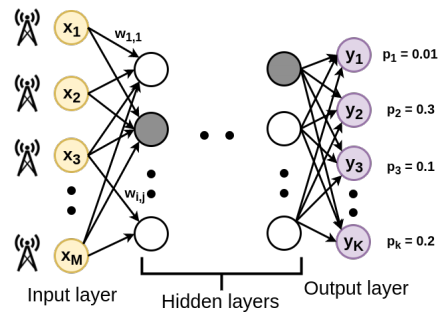

> In the offline phase, you are required to train the deep learning model using the fingerprinting samples. The data provided to the model is X,Y. The X is the RSS matrix for the (M access point * K samples). The Y is the one-hot encoding vectors for the ground truth locations. E.g. If you have K discrete locations in the fingerprint and the ground truth for a sample is the first location of the K, then the one-hot encoding vector corresponds to this sample is $[1,0,0,...,0]$. It means that the probability of the first location is 1, while the probability of the other K-1 locations is 0.   

> To train the deep model you need:

1.   Install the important frameworks.

In [ ]:
# Excute this cell only once.
# !pip install -qq tensorflow-gpu keras tqdm

2.   Import the Keras packages 

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Conv1D, Dropout, Activation, MaxPooling2D
from keras.optimizers import Adam, SGD
import keras.backend as K
import numpy as np
from pylab import *
from keras.utils import to_categorical
import torch
from tensorflow.keras import regularizers

3.   Define your model 

In [ ]:
# Defines the model to be trained
# The model F256->ReLU->F128->ReLU->F64->ReLU->F Output->Softmax       F means full dense layer
# You might want to add some Dropout layers as follows model.add(Dropout(0.5))


def model_1():
  fc_model = tf.keras.Sequential()
  fc_model.add(Dense(256,activation="relu",input_shape=(4,)))
  fc_model.add(Dropout(0.5))
  fc_model.add(Dense(128,activation="relu"))
  #fc_model.add(Dropout(0.5))
  fc_model.add(Dense(64,activation="relu"))
  fc_model.add(Dense(24,activation="softmax"))
  return fc_model




In [ ]:

#encoded = to_categorical(fingerprint_locs)
#encoded = np.zeros((24,24))

rows, cols = (24, 24)
encoded=[]
for i in range(rows):
    col = []
    for j in range(cols):
        col.append(0)
    encoded.append(col)
for i in range (24):
  for j in range (24):
    if(i==j):
      encoded[i][i]=1

encoded

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0,

4.   Train your model 

In [ ]:
# Defines the parameters used and trains the model epochs = 10, batch size = 2, learning rate = 0.0001, loss is categorical_crossentropy, optimizer is Adam.

location_model_1=model_1()
location_model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#location_model_1.build((2 ,4))
BATCH_SIZE = 2
EPOCHS = 10
nn_hist = location_model_1.fit(fingerprint_rss,encoded , batch_size=BATCH_SIZE, epochs=EPOCHS)




Epoch 1/10
12/12 [==============================] - 0s 2ms/step - loss: 16.6432 - accuracy: 0.0000e+00
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 11.0461 - accuracy: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 6.9719 - accuracy: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 6.3475 - accuracy: 0.0841
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 4.8617 - accuracy: 0.0000e+00
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 4.8801 - accuracy: 0.0180
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 4.6297 - accuracy: 0.0283
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 4.6712 - accuracy: 0.0841
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 4.5126 - accuracy: 0.0064
Epoch 10/10
12/12 [==============================] - 0s 3ms/step - loss: 4.4581 - accuracy: 0.0000e+


>## Online phase
In the online tracking phase, a user stands at unknown location hears RSS vector from the different APs in the environment. Your algorithm feed the RSS vector to the network to get the probability distribution for the different locations. Then you can select the location that has the highest probability as the estimated location. 

The test data is defined as follows,

In [ ]:
'''
Test data
'''
test_rss = [[-55., -66., -67., -85.], \
            [-60., -63., -81., -72.], \
            [-34., -100., -90., -78.], \
            [-45., -69., -81., -60.], \
            [-84., -100., -100., -84.], \
            [-51., -60., -69., -78.], \
            [-50., -74., -78., -75.], \
            [-39., -63., -75., -78.], \
            [-42., -68., -69., -72.], \
            [-72., -100., -100., -84.], \
            [-72., -78., -90., -84.], \
            [-66., -81., -100., -72.], \
            [-69., -65., -84., -87.], \
            [-61., -79., -90., -81.], \
            [-60., -63., -81., -84.], \
            [-75., -84., -81., -100.], \
            [-81., -100., -81., -100.], \
            [-78., -100., -66., -100.], \
            [-90., -100., -54., -100.], \
            [-51., -72., -100., -81.], \
            [-73., -100., -100., -82.], \
            [-78., -87., -100., -90.], \
            [-75., -87., -81., -100.], \
            [-80., -91., -62., -100.]] # dBm


test_locs = [[1380, 677], \
             [1786, 666], \
             [2176, 675], \
             [2572, 666], \
             [2780, 1186], \
             [1461, 687], \
             [1855, 681], \
             [2266, 689], \
             [2662, 690], \
             [2856, 1299], \
             [1738, 1419], \
             [2351, 917], \
             [1366, 1003], \
             [1418, 346], \
             [1950, 348], \
             [807, 441], \
             [482, 447], \
             [694, 956], \
             [258, 831], \
             [2407, 260], \
             [2964, 362], \
             [3465, 301], \
             [822, 1471], \
             [611, 1268]] # location coordinates are in pixels to comvert it to meters divide by 100 


In [ ]:
def CDF_draw(loc_err_ec,label_2):
    
    hist_1,bin_edges_1=np.histogram(loc_err_ec)
    pdf = hist_1 / sum(hist_1)
    CFD1=np.cumsum(pdf)
    plt.plot(bin_edges_1[1:], CFD1, label=label_2)
    return None

def euclidean_distance(p, q,p2,q2):
    dist = 0.0
    diff_p_q=(p2-p)+(q2-q)
    diff_p_q=diff_p_q**2
    dist=np.sqrt(diff_p_q)
    return dist

In [ ]:
def euclidean_distance_array(p, q):
    dist = 0.0
    # your code for euclidean distance calculation is here
    p=np.array(p)
    q=np.array(q)
    diff_p_q=np.sum((p-q)**2)
    dist=np.sqrt(diff_p_q)
    return dist

In [ ]:
"""
Localization system
"""
def radar_localization(fingerprint_rss, fingerprint_locs, test_rss, test_locs):
    localization_error_eculadian = []
    localization_error2_manhaten = []
    location_temp=[]
    temp1=[]
    minimum1=[]
    temp_index1=[]
    for i in range(len(test_rss)):
        for j in range(len(fingerprint_rss)):
            temp1.append(euclidean_distance_array(test_rss[i],fingerprint_rss[j]))
        minimum1.append(min(temp1)) #minimum distance between a point and fingerprint_rss vector, to be used for eculidan dis
        temp_index1.append(temp1.index(min(temp1))) #to know the index of the estimated location in the fingerpint_locs for eculidan 
        localization_error_eculadian.append(euclidean_distance_array(fingerprint_locs[temp1.index(min(temp1))],test_locs[i])) #eculadian distance between the real location of the user and the estimated location
        temp1.clear() #to clear the temp array to put all the distance values between a point and the fingerprint rss vector in the next iteration to get the minimum distance for tehm
    return localization_error_eculadian

The final step is to use the test data (test_rss, test_locs) to test and validate your model. 

Test X fraction correct (NN-Score) = 3.22
Test X fraction correct (NN-Accuracy) = 0.08
591.0
745.5416666666666
634.2022724366683
617.9391225308127


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


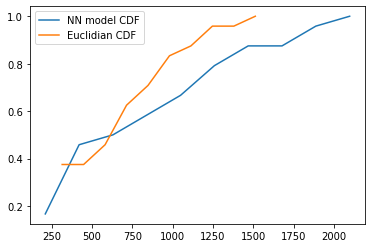

In [ ]:
 # get the probability distribution for each row in the test_rss.

rows, cols = (24, 24)
encoded2=[]
for i in range(rows):
    col = []
    for j in range(cols):
        col.append(0)
    encoded2.append(col)
for i in range (24):
  for j in range (24):
    if(i==j):
      encoded2[i][i]=1



score, accuracy = location_model_1.evaluate(test_rss, encoded2, batch_size=2, verbose=0)
print("Test X fraction correct (NN-Score) = {:.2f}".format(score))
print("Test X fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))


 # get the estimated location ID as a location that has the highet probability for each row in test_rss
 locations_classes=location_model_1.predict_classes(test_rss)





  # calculate the error   
model_eculidan_distance=[]
for i in range(24):
  model_eculidan_distance.append(euclidean_distance(test_locs[i][0],test_locs[i][1],test_locs[locations_classes[i]][0],test_locs[locations_classes[i]][1]))

print(np.median(model_eculidan_distance))
print(np.mean(model_eculidan_distance))
CDF_draw(model_eculidan_distance,"NN model CDF")
plt.legend()


loc_err=[]
loc_err_ec=radar_localization(fingerprint_rss, fingerprint_locs, test_rss, test_locs)
ec_error_median=np.median(loc_err_ec)
print(ec_error_median)
ec_error_mean=np.mean(loc_err_ec)
print(ec_error_mean)
CDF_draw(loc_err_ec,"Euclidian CDF")
plt.legend()

### Bonus
## Different architectures 

In [ ]:
def model_linear1():
  model = Sequential()
  model.add(Dense(1,input_shape=(4,)))
  model.compile(loss = "mean_squared_error", metrics=['mae'],optimizer = "Adam")
  model.summary()
  return model

In [ ]:
model_X=model_linear1()
hist = model_X.fit(fingerprint_rss, fingerprint_locs, epochs = 100, batch_size=2)


Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 2222572.5962 - mae: 1274.3702
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 2087958.0481 - mae: 1210.6115
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 1976945.1683 - mae: 1149.9900
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 2427826.6923 - mae: 1325.9010
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 1603509.2548 - mae: 1046.9484
Epoch 6/100
12/12 [==============================] - 0s 1ms/step - loss: 2058227.3558 - mae: 1206.0983
Epoch 7/100
12/12 [================

In [ ]:
score, accuracy = model_X.evaluate(test_rss, test_locs, batch_size=2, verbose=0)
print("Test X fraction correct (NN-Score) = {:.2f}".format(score))
print("Test X fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test X fraction correct (NN-Score) = 1698625.00
Test X fraction correct (NN-Accuracy) = 1000.04


In [ ]:
def model_1():
  model = Sequential()
  model.add(Dense(100,input_shape=(4,),activation="tanh"))
  model.add(Dense(2,bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l2(1e-4)))
  model.compile(loss = "mean_squared_error", metrics=['mae'],optimizer = "Adam")
  model.summary()
  return model

In [ ]:
model_1_1=model_1()
model_1_1.compile('adam',metrics=['mae'])
hist = model_X.fit(fingerprint_rss, fingerprint_locs, epochs = 100, batch_size=2)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_81 (Dense)             (None, 2)                 202       
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 675775.6875 - mae: 623.0167
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 675242.8750 - mae: 623.0972
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 674802.9375 - mae: 623.1830
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 674316.8125 - mae: 623.1686
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 673831.2500 - mae: 623.3561
Epoch 6/100


In [ ]:

score, accuracy = model_1_1.evaluate(test_rss, test_locs, batch_size=2, verbose=0)

print("Test X fraction correct (NN-Score) = {:.2f}".format(score))
print("Test X fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test X fraction correct (NN-Score) = 0.00
Test X fraction correct (NN-Accuracy) = 1280.73


In [ ]:
def model_2():
  model = Sequential()
  model.add(Dense(100,input_shape=(4,),activation="relu"))
  model.add(Dense(2,bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l2(1e-4)))
  model.compile(loss = "mean_squared_error", metrics=['mae'],optimizer = "Adam")
  model.summary()
  return model

In [ ]:
model_1_2=model_2()
hist = model_X.fit(fingerprint_rss, fingerprint_locs, epochs = 100, batch_size=2)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_83 (Dense)             (None, 2)                 202       
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 648376.4375 - mae: 636.9111
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 648240.3125 - mae: 637.0181
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 648171.3125 - mae: 637.1876
Epoch 4/100
12/12 [==============================] - 0s 1ms/step - loss: 648019.0625 - mae: 637.4462
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 647874.6875 - mae: 637.5023
Epoch 6/100


In [ ]:
score, accuracy = model_1_2.evaluate(test_rss, test_locs, batch_size=2, verbose=0)
print("Test X fraction correct (NN-Score) = {:.2f}".format(score))
print("Test X fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test X fraction correct (NN-Score) = 2329511.25
Test X fraction correct (NN-Accuracy) = 1268.03


In [ ]:
def model_3():
  model = Sequential()
  model.add(Dense(100,input_shape=(4,),activation="relu"))
  model.add(Dense(2,bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l2(1e-4),activation="relu"))
  model.compile(loss = "mean_squared_error", metrics=['mae'],optimizer = "Adam")
  model.summary()
  return model

In [ ]:
model_1_3=model_3()
hist = model_1_3.fit(fingerprint_rss, fingerprint_locs, epochs = 100, batch_size=2)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_85 (Dense)             (None, 2)                 202       
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 2067175.7500 - mae: 1189.3769
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 2364890.4327 - mae: 1245.7287
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 2222954.0577 - mae: 1159.6288
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1878247.5577 - mae: 1090.4814
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1870748.0096 - mae: 1100.7809
Ep

In [ ]:
score, accuracy = model_1_3.evaluate(test_rss, test_locs, batch_size=2, verbose=0)
print("Test X fraction correct (NN-Score) = {:.2f}".format(score))
print("Test X fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test X fraction correct (NN-Score) = 2049964.88
Test X fraction correct (NN-Accuracy) = 1043.75


In [ ]:
def model_4():
  model = Sequential()
  model.add(Dense(100,input_shape=(4,),activation="tanh"))
  model.add(Dense(2,bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l2(1e-4),activation="relu"))
  model.compile(loss = "mean_squared_error", metrics=['mae'],optimizer = "Adam")
  model.summary()
  return model

In [ ]:
model_1_4=model_4()
hist = model_1_4.fit(fingerprint_rss, fingerprint_locs, epochs = 100, batch_size=2)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 202       
Total params: 702
Trainable params: 702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 2050097.7212 - mae: 1207.9702
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 2164421.1827 - mae: 1228.2619
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1981925.1346 - mae: 1191.3553
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 2560436.4038 - mae: 1331.4700
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 2058413.2596 - mae: 1209.3054
Ep

In [ ]:
score, accuracy = model_1_3.evaluate(test_rss, test_locs, batch_size=2, verbose=0)
print("Test X fraction correct (NN-Score) = {:.2f}".format(score))
print("Test X fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test X fraction correct (NN-Score) = 2049964.88
Test X fraction correct (NN-Accuracy) = 1043.75


In [ ]:
def model_5():
  model = Sequential()
  model.add(Dense(50,input_shape=(4,),activation="tanh"))
  model.add(Dense(50,activation="relu"))
  model.add(Dense(50,activation="tanh"))
  model.add(Dense(2,bias_regularizer=regularizers.l1(1e-4),activity_regularizer=regularizers.l2(1e-4)))
  model.compile(loss = "mean_squared_error", metrics=['mae'],optimizer = "Adam")
  model.summary()
  return model

In [ ]:
model_1_5=model_5()
hist = model_1_5.fit(fingerprint_rss, fingerprint_locs, epochs = 100, batch_size=2)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_89 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_90 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_91 (Dense)             (None, 2)                 102       
Total params: 5,452
Trainable params: 5,452
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 0s 2ms/step - loss: 1926259.1154 - mae: 1193.5422
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1686150.5385 - mae: 1067.5981
Epoch 3/100
12/12 [========================

In [ ]:
score, accuracy = model_1_3.evaluate(test_rss, test_locs, batch_size=2, verbose=0)
print("Test X fraction correct (NN-Score) = {:.2f}".format(score))
print("Test X fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Test X fraction correct (NN-Score) = 2049964.88
Test X fraction correct (NN-Accuracy) = 1043.75


In [ ]:
for i in range(24):
  for j in range(24)[i+1:]:
    print(j)




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
10
11
12
13
14
15
16
17
18
19
20
21
22
23
11
12
13
14
15
16
17
18
19
20
21
22
23
12
13
14
15
16
17
18
19
20
21
22
23
13
14
15
16
17
18
19
20
21
22
23
14
15
16
17
18
19
20
21
22
23
15
16
17
18
19
20
21
22
23
16
17
18
19
20
21
22
23
17
18
19
20
21
22
23
18
19
20
21
22
23
19
20
21
22
23
20
21
22
23
21
22
23
22
23
23


# 3. Requirements
It is required to implement the following,
*   The Deep learning-based localization system using a classifier with the described parameters.
*   Draw the Cumulative distribution function (CDF) for the distance error using the proposed test data .
*   Compare the CDF for the deep learning-based system with RADAR using Euclidean distance.
*   Draw a figure that shows the effect of changing the learnng rate (lr= $10^{-1}$, $10^{-2}$, $10^{-3}$, $10^{-4}$, $10^{-5}$) on the median localization error.
*   Draw a figure that shows the effect of changing number of epochs on the median localization error.

# 4. Bonus


*   Try different deep learning models for localization. 


# 5. Possible resources


*   [DeepLoc paper Section 3.1.3](https://www.academia.edu/download/61164055/DeepLocSMM20191108-93295-21bjio.pdf)
*   [Logistic classifier](https://youtu.be/G8eNWzxOgqE)
*   [Classifier implementation](https://victorzhou.com/blog/keras-neural-network-tutorial/)

# 6. Final notes

*   It is reuired to deliver the notebook with the Deep learning implementation, the CDFs and the error statistics (mean and median).
*   Assignment delivery date is on Thursday **April 22**.







